# Tracé des mesures effectuées dans le cadre du TIPE

L'idée de ce notebook est de représenter graphiquement les relevés de mesure.

## Lecture des données

Les données relevées sont dans un fichier issu d'un tableur, dont la compatibilité avec
les bibliothèques de programmation n'est pas idéale.

Pour cette raison, une extraction textuelle est faite et ce notebook utilise le
fichier texte pour construire les séries de données à représenter.

In [2]:
# Read file content.
with open('mesures.txt', encoding="utf-8") as f:
    raw_data = f.read()

Les données du tableur sont en format décimal français, i.e. avec la virgule `,` comme séparateur
décimal. Pour simplifier la conversion de données, et parce qu'on constate que cette conversion
n'a pas d'effets de bord, ces virgules sont converties en point décimal `.` du système américain
utilisé par la majorité des langages de programmation.

In [3]:
# Convert french decimal separator to imperial decimal separator.
raw_data = raw_data.replace(",", ".")

Les données se présentent sous la forme de lignes de texte qui forment des colonnes, dont les valeurs
sont séparées par des caractères de tabulation (`"\t"`).

La toute première ligne contient le label des colonnes. Elle est extraite séparément pour pouvoir y
référer plus facilement ensuite.

Les lignes suivantes contiennent les données. Elles sont organisées par groupes, correspondant aux
différentes séries de mesures. Ces lignes groupées sont séparés par une ligne vide entre elles.

In [4]:
# Split according to empty lines.
#
# First is header with column names.
#
# Then come the various data series.
header, *raw_series = raw_data.split("\n\n")
header = header.split('\t')

# Look at what we got.
print(header)
print(f"Found {len(raw_series)} raw data blocks")

['longueur (inch)', 'longueur (cm)', 'mesure (lbs)', 'mesure (kg)', 'force (N)', '', '', '', '', '']
Found 8 raw data blocks


Les lignes ainsi récupérées sont brutes : ce sont du texte.

Il faut maintenant convertir en valeurs numériques que la bibliothèque de rendu graphique pourra exploiter.

In [6]:
# Convert raw data serie to numeric values.

LEN_COL = 1
EFFORT_COL = 4
TITLE_COL = 5

titles = []
series = []

for raw_serie in raw_series:
    serie = []
    for line in raw_serie.split("\n"):
        
        # Do not let empty lines bother us.
        if not line.strip():
            continue
        
        # Get and convert the relevant column values.
        values = line.split("\t")
        serie.append((float(values[LEN_COL]), float(values[EFFORT_COL])))

        # Make an attempt at finding the serie title.
        try:
            title = values[TITLE_COL]
            if title.startswith("Mesure"):
                titles.append(title)
        except IndexError:
            pass

    series.append(serie)

    
print(f"""
        {'\n\t'.join(titles)}
    
{series=}
""")


        Mesure 1 : 70 inches
	Mesure 2 : 66 inches
	Mesure 3 : 68 inches
	Mesure 4 : branches de 42 lbs
	Mesure 5 : branches de 36 lbs au max
	Mesure 6 : branches de 36 lbs au min
	Mesure 7 : carbone-foam-graphène en 68 inch 36 lbs courbure normale
	Mesure 8 : carbone-foam-graphène en 68 inch 36 lbs courbure forte
    
series=[[(0.0, 0.0), (5.08, 40.5), (10.16, 64.35), (15.24, 84.6), (20.32, 103.05), (25.4, 112.95), (30.48, 126.9), (35.56, 145.8), (40.64, 154.8), (45.72, 177.75), (50.8, 193.5), (53.34, 205.2)], [(0.0, 0.0), (5.08, 48.6), (10.16, 72.0), (15.24, 92.7), (20.32, 110.25), (25.4, 124.2), (30.48, 138.15), (35.56, 155.7), (40.64, 171.0), (45.72, 189.9), (50.8, 210.6), (53.34, 242.1)], [(0.0, 0.0), (5.08, 42.75), (10.16, 66.6), (15.24, 85.5), (20.32, 103.05), (25.4, 116.1), (30.48, 127.35), (35.56, 142.2), (40.64, 159.75), (45.72, 175.05), (50.8, 193.05), (53.34, 204.75)], [(0.0, 0.0), (5.08, 48.6), (10.16, 78.75), (15.24, 100.35), (20.32, 117.45), (25.4, 137.25), (30.48, 154.

À ce moment, nous avons toutes les séries numériques dont nous avons besoin.

## Tracer les graphes

Le plus efficace est certainement d'utiliser la bibliothèque [`matplotlib`](https://matplotlib.org/).

In [7]:
import matplotlib.pyplot as plt

Comme il y a plusieurs séries de données, il est judicieux de coder une fonction qui
peut afficher une série de données qu'on lui fournit en argument. Cela facilitera la
génération des graphes pour l'ensemble des séries.

In [8]:
def draw_plot(title, serie):
    # Set data to expected format.
    lengthes = [x for x, y in serie]
    efforts = [y for x, y in serie]

    # Put relevant label on the graph.
    plt.title(title)
    plt.xlabel(header[LEN_COL] + " (± 0.9 cm)")
    plt.ylabel(header[EFFORT_COL] + " (± 2.0 N)")
    
    # Draw theoritical constant behaviour.
    plt.plot(
        [0, lengthes[-1]], [0, efforts[-1]],
        color="orange",
        label="Comportement linéaire théorique"            
    )

    # Draw collected data.
    # Cf. https://stackoverflow.com/a/8409110.    
    plt.plot(
        lengthes, efforts,
        linestyle=':', marker='+',
        label="Mesures"
    )

    # Ensure (0, 0) is actually at bottom left of graph.
    plt.ylim(bottom=0)
    plt.xlim(left=0)

    # Fill under the curve to show the total effort work.
    plt.fill_between(
        lengthes, efforts,
        color='C0', alpha=0.2,
        label="Travail"
    )

    # Trigger graph rendering.
    plt.legend()

    plt.savefig(f"plots/{title}.png")
    plt.show()

Pour faire un graphe par serie, il faut maintenant appeler cette fonction pour chaque série.

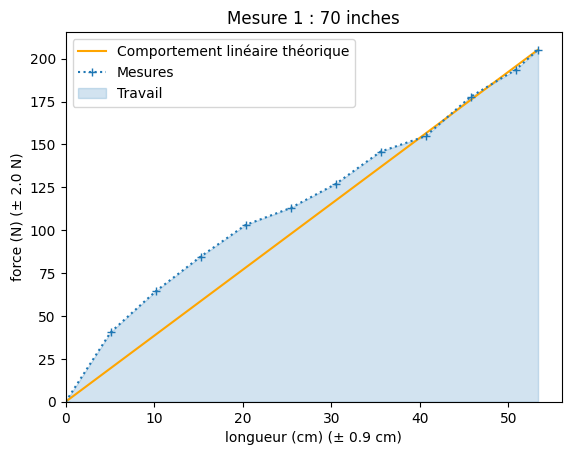

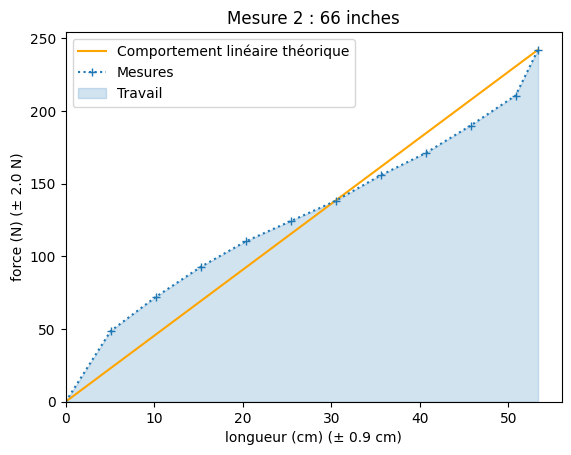

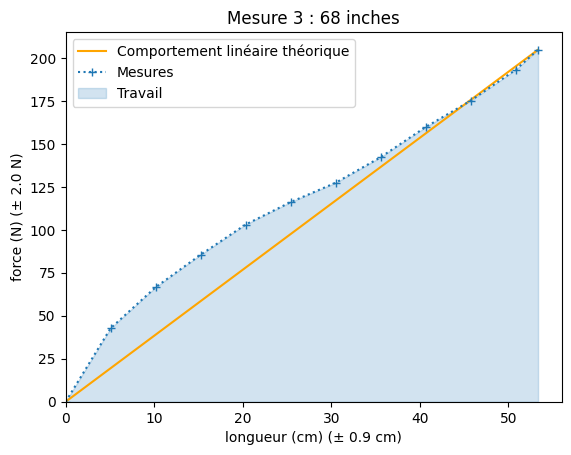

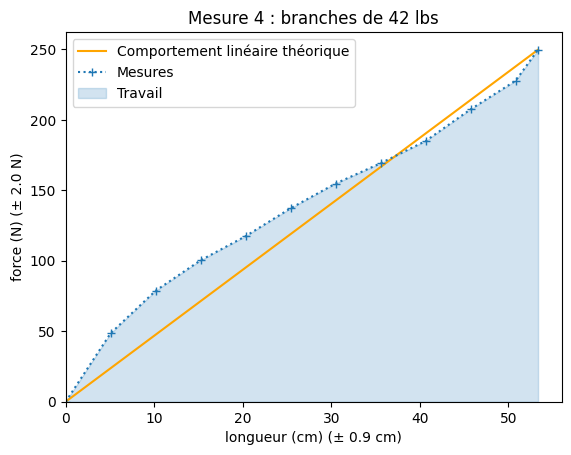

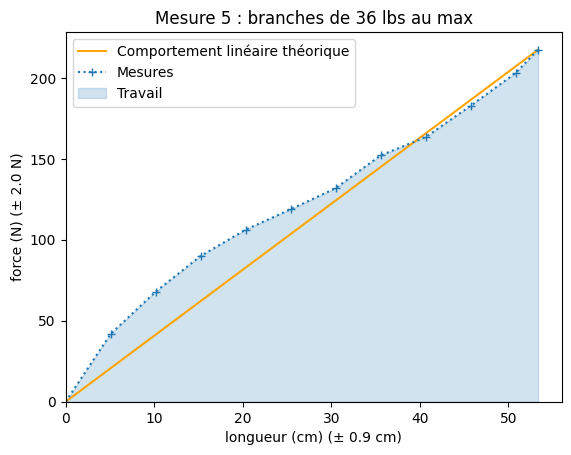

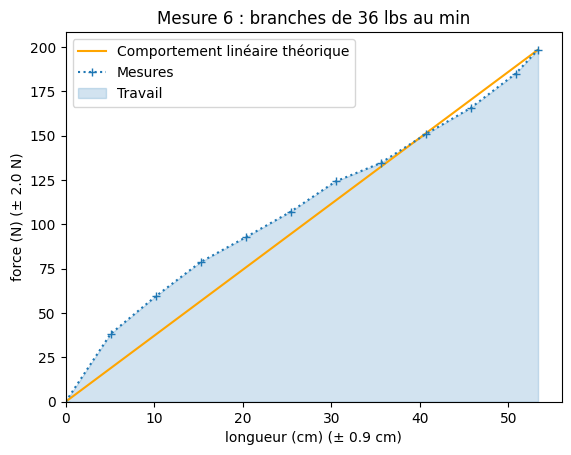

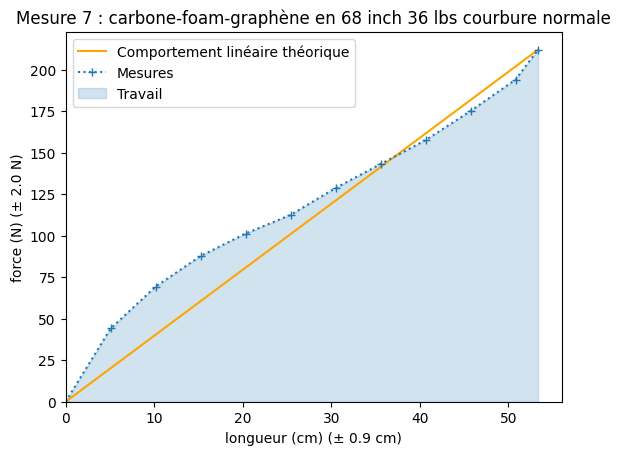

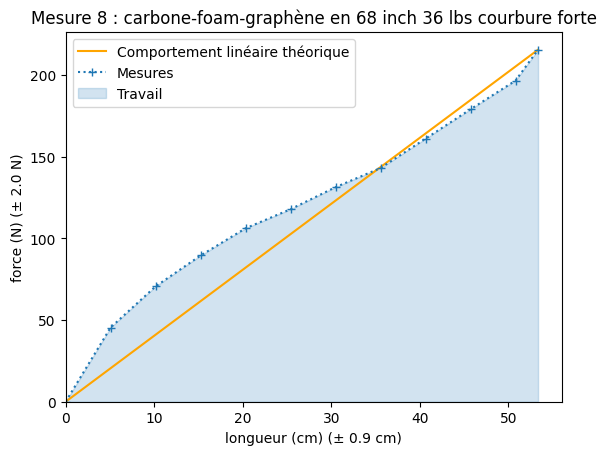

In [9]:
for i, (title, serie) in enumerate(zip(titles, series)):
    draw_plot(title, serie)

## Comparaisons

L'analyse comparée de plusieurs courbes est facilitée par une représentation
de ces courbes sur le même graphique.

On commence par identifier les groupes de données dont les comparaisons
semblent les plus pertinentes.

In [11]:
# Identify the relevant comparisons.
comparisons = [
    ("Variation de la longueur", (1, 2, 3)),
    ("Variation de la puissance", (1, 4, 5, 6)),
    ("Variation de la matière et de courbure", (3, 7, 8)),
]

Puis on génére les graphes correspondants.

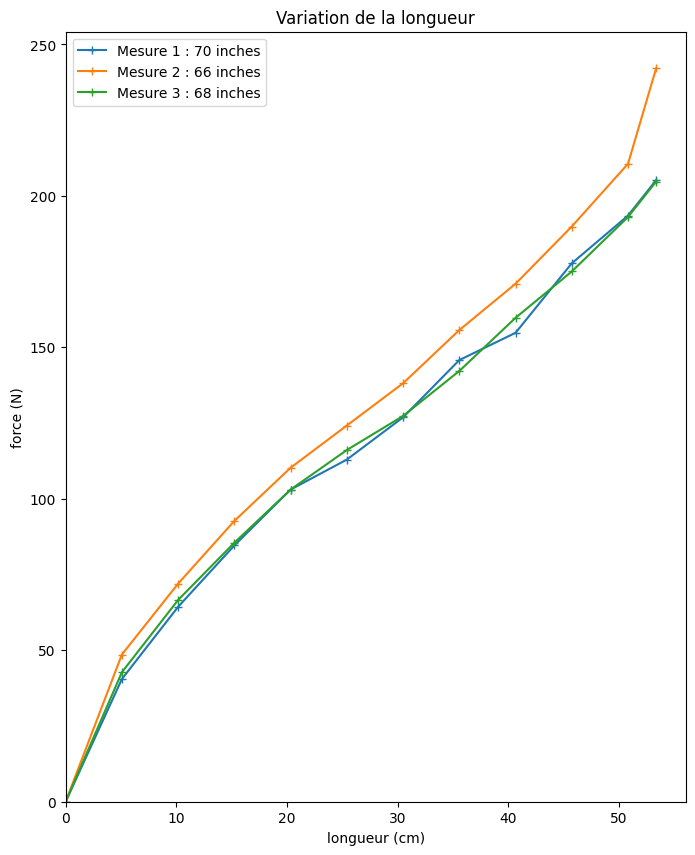

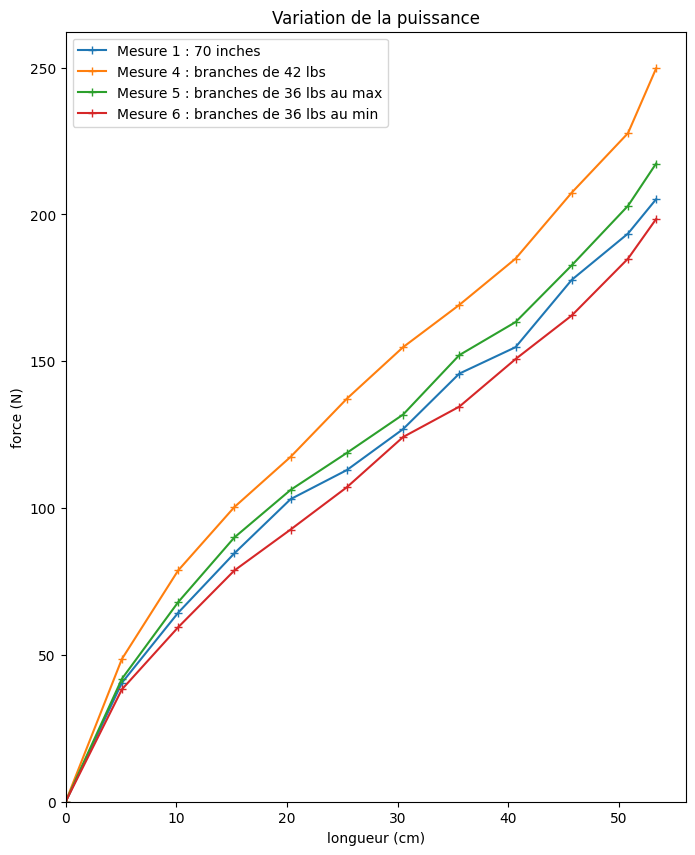

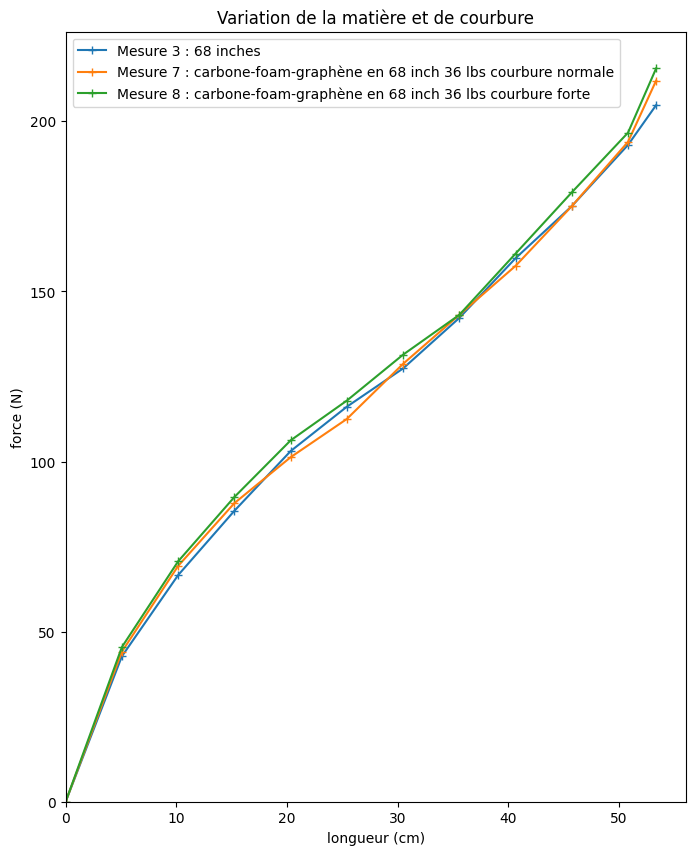

In [12]:
# Make plots bigger.
plt.rcParams["figure.figsize"] = (8, 10)

for title, curves in comparisons:
    plt.title(title)
    plt.xlabel(header[LEN_COL])
    plt.ylabel(header[EFFORT_COL])

    #plt.figure().set_figheight(10)

    for curve in curves:
        # Set data to expected format.
        lengthes = [x for x, y in series[curve - 1]]
        efforts = [y for x, y in series[curve - 1]]
        
        # Draw collected data.
        # Cf. https://stackoverflow.com/a/8409110.
        plt.plot(
            lengthes, efforts,
            #linestyle=':',
            marker='+',
            label=titles[curve - 1]
        )

    # Ensure (0, 0) is actually at bottom left of graph.
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    
    # Trigger graph rendering.
    plt.legend()
    
    plt.savefig(f"plots/comparison-{title}.png")
    plt.show()    

## Calcul du travail

Le travail correspond à l'aire sous la courbe.

Par curiosité, deux méthodes sont implémentées. L'une donne une estimation
d'un comportement linéaire théorique, l'autre reprend chaque point des
mesures pour être avoir la valeur expérimentale.

In [31]:
def work_trapeze(serie):
    result = 0
    
    # First point is always 0 cm, 0 N.
    prev_length, prev_effort = 0, 0
    
    for length, effort in serie[1:]:
        # Use simple trapeze surface formula.
        result += (prev_effort + effort) * (length - prev_length) / 2
        prev_length, prev_effort = length, effort

    # Length is in cm, we want joules.
    return result / 100

def work_triangle(serie):
    length, effort = serie[-1]
    return length * effort / 2 / 100

for title, serie in zip(titles, series):
    print(f"{title:70} raw: {(work_triangle(serie)):.2f} J, fine: {work_trapeze(serie):.2f} J")

Mesure 1 : 70 inches                                                   raw: 54.73 J, fine: 61.32 J
Mesure 2 : 66 inches                                                   raw: 64.57 J, fine: 67.11 J
Mesure 3 : 68 inches                                                   raw: 54.61 J, fine: 61.69 J
Mesure 4 : branches de 42 lbs                                          raw: 66.61 J, fine: 72.75 J
Mesure 5 : branches de 36 lbs au max                                   raw: 57.97 J, fine: 64.08 J
Mesure 6 : branches de 36 lbs au min                                   raw: 52.93 J, fine: 57.89 J
Mesure 7 : carbone-foam-graphène en 68 inch 36 lbs courbure normale    raw: 56.53 J, fine: 61.86 J
Mesure 8 : carbone-foam-graphène en 68 inch 36 lbs courbure forte      raw: 57.49 J, fine: 63.29 J
